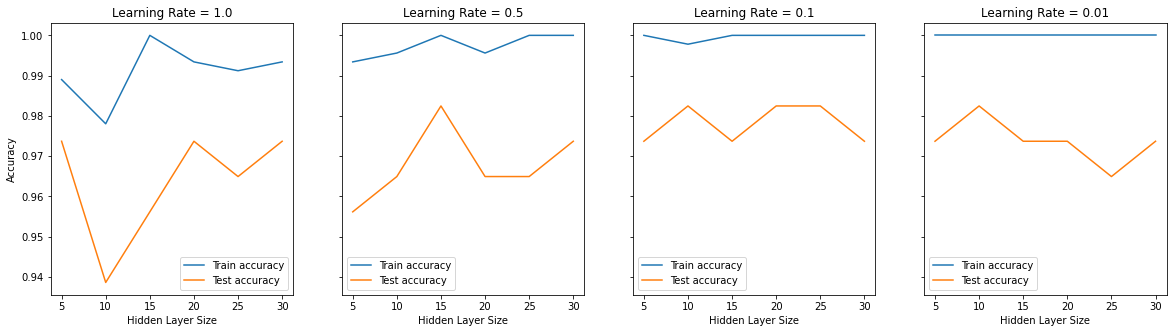

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['id', 'diagnosis'] + ['feature_' + str(i) for i in range(1, 31)]

data = pd.read_csv(url, header=None, names=column_names)
X = data.iloc[:, 2:]
y = data['diagnosis']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate the MLP classifier for different hidden layer sizes and learning rates
hidden_layer_sizes = [5, 10, 15, 20, 25, 30]
learning_rates = [1.0, 0.5, 0.1, 0.01]

results = []

for hls in hidden_layer_sizes:
    for lr in learning_rates:
        mlp = MLPClassifier(hidden_layer_sizes=(hls,), learning_rate_init=lr, max_iter=1000, random_state=42)
        mlp.fit(X_train_scaled, y_train)
        train_acc = accuracy_score(y_train, mlp.predict(X_train_scaled))
        test_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
        results.append((hls, lr, train_acc, test_acc))

# Plot the results
fig, ax = plt.subplots(1, len(learning_rates), figsize=(20, 5), sharey=True)

for i, lr in enumerate(learning_rates):
    ax[i].plot(hidden_layer_sizes, [r[2] for r in results if r[1] == lr], label="Train accuracy")
    ax[i].plot(hidden_layer_sizes, [r[3] for r in results if r[1] == lr], label="Test accuracy")
    ax[i].set_title(f"Learning Rate = {lr}")
    ax[i].set_xlabel("Hidden Layer Size")
    ax[i].set_xticks(hidden_layer_sizes)
    ax[i].legend()

ax[0].set_ylabel("Accuracy")
plt.show()


C:\Users\Nasser\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


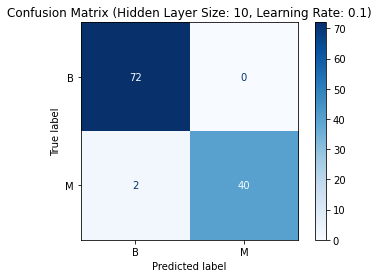

In [2]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# Find the best model
best_model = max(results, key=lambda x: x[3])
best_hls, best_lr, _, _ = best_model

# Train the best model
best_mlp = MLPClassifier(hidden_layer_sizes=(best_hls,), learning_rate_init=best_lr, max_iter=1000, random_state=42)
best_mlp.fit(X_train_scaled, y_train)

# Create a confusion matrix
y_pred = best_mlp.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plot_confusion_matrix(best_mlp, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (Hidden Layer Size: {best_hls}, Learning Rate: {best_lr})")
plt.show()
